<a href="https://colab.research.google.com/github/gesiele-vaz/predicao-vendas-marketing/blob/main/predicao_vendas_mkt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#imports
import pandas as pd
import sklearn as skl
import seaborn as sbn
import matplotlib.pyplot as plt
mkt = pd.read_csv("MKT.csv")

In [ ]:
mkt.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


Analisando os dados:
Aplicado a função info para verificação do tipo de dados, e se há valores nulos presentes, bem como a função duplicated para verificação de dados duplicados. Conforme valores apresentados, nota-se que os dados estão em conformidade.
Realizado o describe para verificar informações estísticas como desvio padrão, média, contagem, entre outras, com base nas colunas.


In [ ]:
mkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [ ]:
mkt.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
166    False
167    False
168    False
169    False
170    False
Length: 171, dtype: bool

In [ ]:
mkt.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


Analisando correlação dos dados

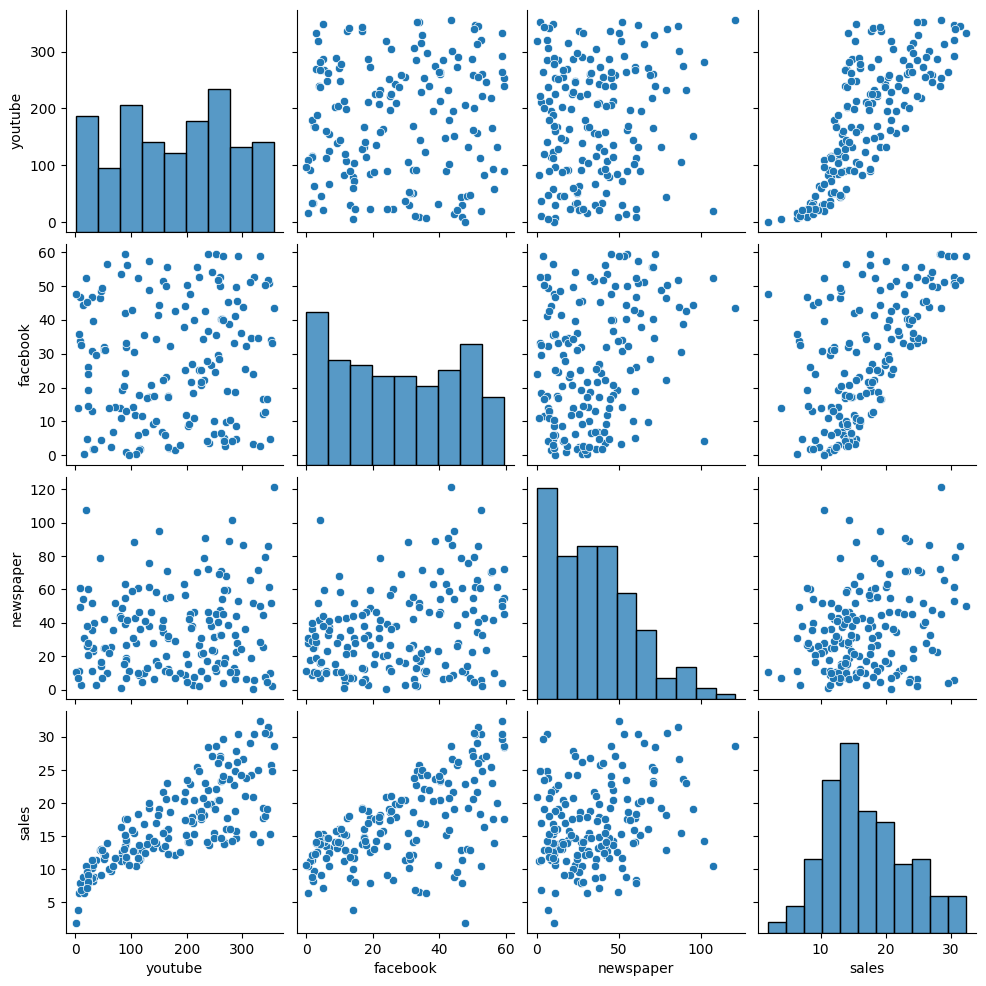

In [ ]:
sbn.pairplot(mkt)

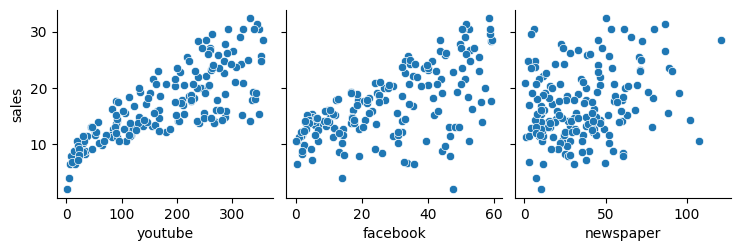

In [ ]:
sbn.pairplot(mkt, x_vars=['youtube','facebook','newspaper'], y_vars='sales')

treinando modelo e realizando predição
definido as variávei x e y para aplicar nos modelos de treinamento e teste do sklearn

In [ ]:
x = mkt[['youtube','facebook','newspaper']]
y = mkt[['sales']]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y , train_size= 0.7, test_size= 0.3, random_state= 42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(119, 3)
(52, 3)
(119, 1)
(52, 1)


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(x_test)

definição das métricas para r2

In [ ]:
from sklearn.metrics import r2_score
R = r2_score(y_test, y_pred)
print('r_quadrado', R)

r_quadrado 0.882423505618885


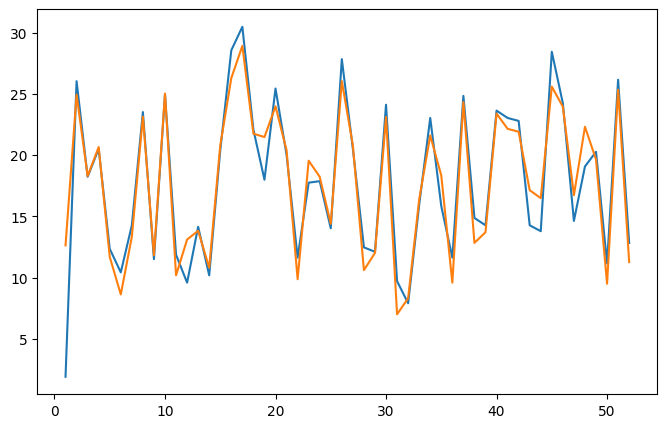

In [ ]:
g = [i for i in range(1, 53,1)]
fig = plt.figure(figsize=(8,5))
plt.plot(g, y_test)
plt.plot(g, y_pred)